# Data Normalization and Correlation Analysis
## Group Project - Step 3

**Objectives:**
1. Normalize all variables using z-score or min-max scaling (with justification)
2. Analyze correlations among fundamental frequency, Jitter, and Shimmer variables
3. Keep representative variables and remove redundant ones

**Inputs:** Original DataFrame  
**Outputs:** Normalized DataFrame, cleaned_df

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## 1. Load the Dataset
First, we load the original dataframe as asked as the input for this step. 

In [2]:
# Load the dataset
df = pd.read_csv('coronary_disease.csv')

# Display basic information
print("Dataset Shape:", df.shape)

display(df.head())

Dataset Shape: (4238, 16)


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 2. Data Preparation
Here we identify numeric columns and separate features for normalization

In [9]:
# Identify numeric columns (excluding categorical columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Numeric columns to normalize: ({len(numeric_cols)}):")
for i, col in enumerate(numeric_cols, 1):
    print(f"{i}. {col}")

Numeric columns to normalize: (14):
1. age
2. education
3. cigsPerDay
4. BPMeds
5. prevalentStroke
6. prevalentHyp
7. diabetes
8. totChol
9. sysBP
10. diaBP
11. BMI
12. heartRate
13. glucose
14. TenYearCHD


## 3. Check Data Distribution
Then we want to analyze distributions to justify the normalization method choice

In [7]:
# Statistical summary of numeric variables
print("Statistical Summary:")
display(df[numeric_cols].describe())

# Check for outliers using IQR method
print("\nOutlier Detection (IQR Method):")
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_df['Outlier %'] = (outlier_df['Outlier Count'] / len(df) * 100).round(2)
display(outlier_df.sort_values('Outlier Count', ascending=False).head(10))

Statistical Summary:


,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4133.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,49.584946,1.978950,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,8.572160,1.019791,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000



Outlier Detection (IQR Method):


,Outlier Count,Outlier %
TenYearCHD,644,15.20
glucose,188,4.44
sysBP,126,2.97
BPMeds,124,2.93
diabetes,109,2.57
BMI,97,2.29
diaBP,81,1.91
heartRate,76,1.79
totChol,56,1.32
prevalentStroke,25,0.59


## 4. Normalization Method Selection

### Justification:

Based on the outlier analysis done above, we decided that will use **Min-Max Scaling** because:
- Most variables have low outlier percentages (< 5%), making the method viable
- Several variables are binary (BPMeds, prevalentStroke, prevalentHyp, diabetes), which naturally fit the [0,1] range
- Medical measurements have meaningful bounded ranges that the Min-Max method preserves well
- Given that in following steps we want to use deep learning and trained models, the results from this method are better suited fo the subsequent analysis
- The [0,1] range makes feature importance more interpretable in medical contexts
- We can't assume Normal Distribution for this variables, and therefore would be hard to use z-score normalization

In [11]:
# Create a copy of the dataframe to preserve original data
df_normalized = df.copy()

# Initialize the StandardScaler (Z-score normalization)
scaler = StandardScaler()

# Apply normalization to numeric columns
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nNormalized Data Summary:")
display(df_normalized[numeric_cols].describe())

# Verify normalization (mean ≈ 0, std ≈ 1)
print("\nVerification - Means:")
print(df_normalized[numeric_cols].mean().round(10))
print("\nVerification - Standard Deviations:")
print(df_normalized[numeric_cols].std().round(10))


Normalized Data Summary:


,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4.238000e+03,4.133000e+03,4.209000e+03,4.185000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.188000e+03,4.238000e+03,4.238000e+03,4.219000e+03,4.237000e+03,3.850000e+03,4.238000e+03
mean,1.307747e-16,2.707730e-17,-8.440755e-17,1.018699e-17,-1.005960e-17,-5.029798e-17,-4.359158e-17,3.155706e-16,-4.510052e-16,2.984347e-16,7.410258e-17,3.353990e-18,1.753287e-16,-1.739472e-17
std,1.000118e+00,1.000121e+00,1.000119e+00,1.000119e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000119e+00,1.000118e+00,1.000118e+00,1.000119e+00,1.000118e+00,1.000130e+00,1.000118e+00
min,-2.051644e+00,-9.600680e-01,-7.553765e-01,-1.747408e-01,-7.703255e-02,-6.711009e-01,-1.624766e-01,-2.909534e+00,-2.216987e+00,-2.929899e+00,-2.515428e+00,-2.651015e+00,-1.751762e+00,-4.233055e-01
25%,-8.849392e-01,-9.600680e-01,-7.553765e-01,-1.747408e-01,-7.703255e-02,-6.711009e-01,-1.624766e-01,-6.890564e-01,-6.967125e-01,-6.627903e-01,-6.696708e-01,-6.552023e-01,-4.577704e-01,-4.233055e-01
50%,-6.824590e-02,2.064407e-02,-7.553765e-01,-1.747408e-01,-7.703255e-02,-6.711009e-01,-1.624766e-01,-6.104261e-02,-1.975180e-01,-7.502146e-02,-9.854027e-02,-7.309030e-02,-1.655788e-01,-4.233055e-01
75%,7.484475e-01,1.001356e+00,9.226620e-01,-1.747408e-01,-7.703255e-02,1.490089e+00,-1.624766e-01,5.894002e-01,5.285832e-01,5.862185e-01,5.485776e-01,5.921806e-01,2.100960e-01,-4.233055e-01
max,2.381834e+00,1.982068e+00,5.117758e+00,5.722762e+00,1.298153e+01,1.490089e+00,6.154733e+00,1.030118e+01,7.381163e+00,5.004980e+00,7.598241e+00,5.581712e+00,1.302478e+01,2.362360e+00



Verification - Means:
age                0.0
education          0.0
cigsPerDay        -0.0
BPMeds             0.0
prevalentStroke   -0.0
prevalentHyp      -0.0
diabetes          -0.0
totChol            0.0
sysBP             -0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD        -0.0
dtype: float64

Verification - Standard Deviations:
age                1.000118
education          1.000121
cigsPerDay         1.000119
BPMeds             1.000119
prevalentStroke    1.000118
prevalentHyp       1.000118
diabetes           1.000118
totChol            1.000119
sysBP              1.000118
diaBP              1.000118
BMI                1.000119
heartRate          1.000118
glucose            1.000130
TenYearCHD         1.000118
dtype: float64


## 5. Correlation Analysis
### First we identify meaningful variable groups for the correlation analysis

Since this is cardiovascular disease data, we'll analyze correlations within
physiologically related variable groups:

In [18]:
# We define these variable groups based on physiological relationships
variable_groups = {
    'Blood Pressure': {
        'variables': ['sysBP', 'diaBP', 'BPMeds']
    },
    'Metabolic': {
        'variables': ['totChol', 'glucose', 'BMI', 'diabetes']
    },
    'Cardiovascular Risk': {
        'variables': ['prevalentStroke', 'prevalentHyp', 'heartRate']
    },
    'Lifestyle': {
        'variables': ['cigsPerDay', 'BMI', 'education']
    }
}


These are the justifications for each group:

- "Blood Pressure": Systolic and diastolic BP are mechanically related; BPMeds affects both
- "Metabolic": Metabolic syndrome variables often correlated (cholesterol, glucose, BMI)
- "Cardiovascular Risk": Cardiovascular events and hypertension are related risk factors
- "Lifestyle": Lifestyle factors (smoking, weight, education) often interconnected


## 6. Correlation Analysis for each group
Then we calculate and visualize correlations for each identified group, having as the output a Correlation Matrix and a Heatmap for each analysis. Also at the end there is the Correlation Matrix for all numeric variables.


Correlation Matrix:


,sysBP,diaBP,BPMeds
sysBP,1.000,0.784,0.254
diaBP,0.784,1.000,0.194
BPMeds,0.254,0.194,1.000


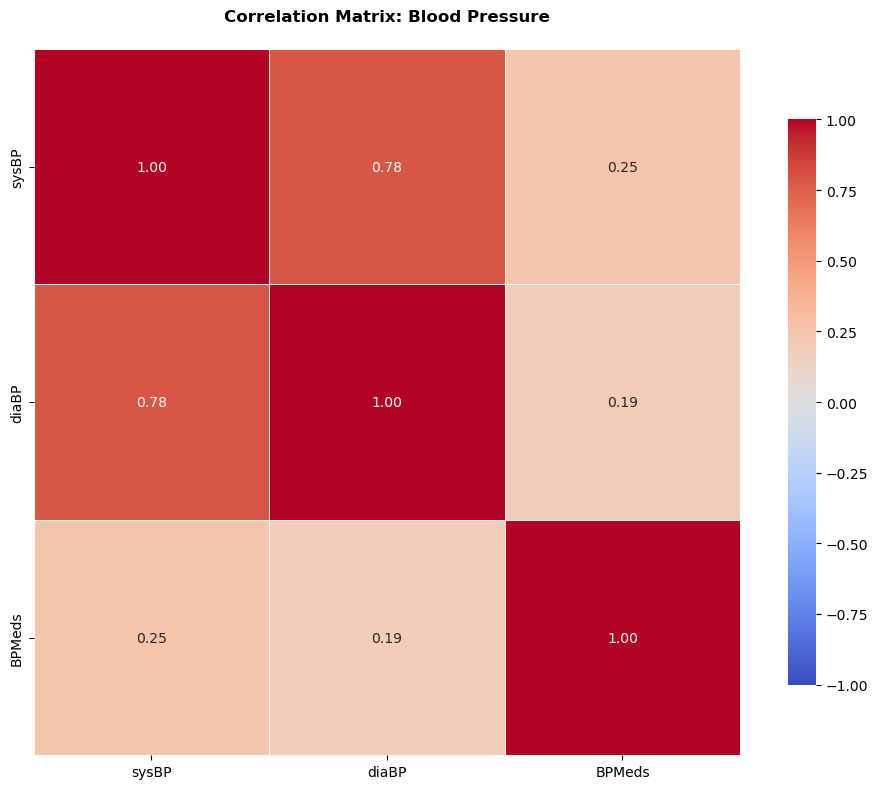


Correlation Matrix:


,totChol,glucose,BMI,diabetes
totChol,1.000,0.046,0.116,0.040
glucose,0.046,1.000,0.087,0.618
BMI,0.116,0.087,1.000,0.087
diabetes,0.040,0.618,0.087,1.000


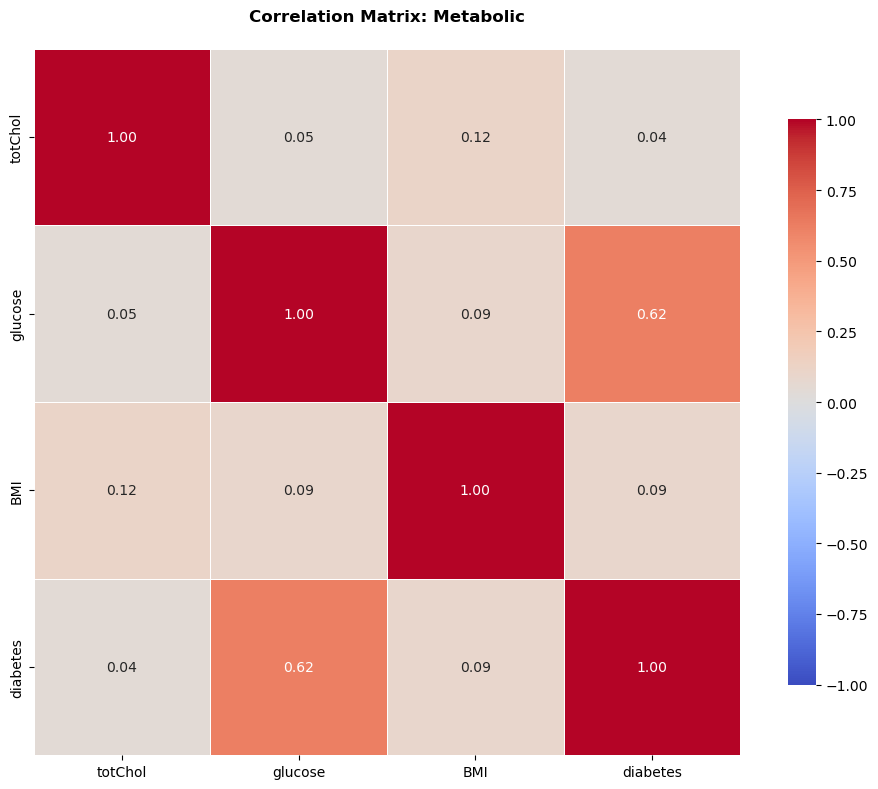


Correlation Matrix:


,prevalentStroke,prevalentHyp,heartRate
prevalentStroke,1.000,0.075,-0.018
prevalentHyp,0.075,1.000,0.147
heartRate,-0.018,0.147,1.000


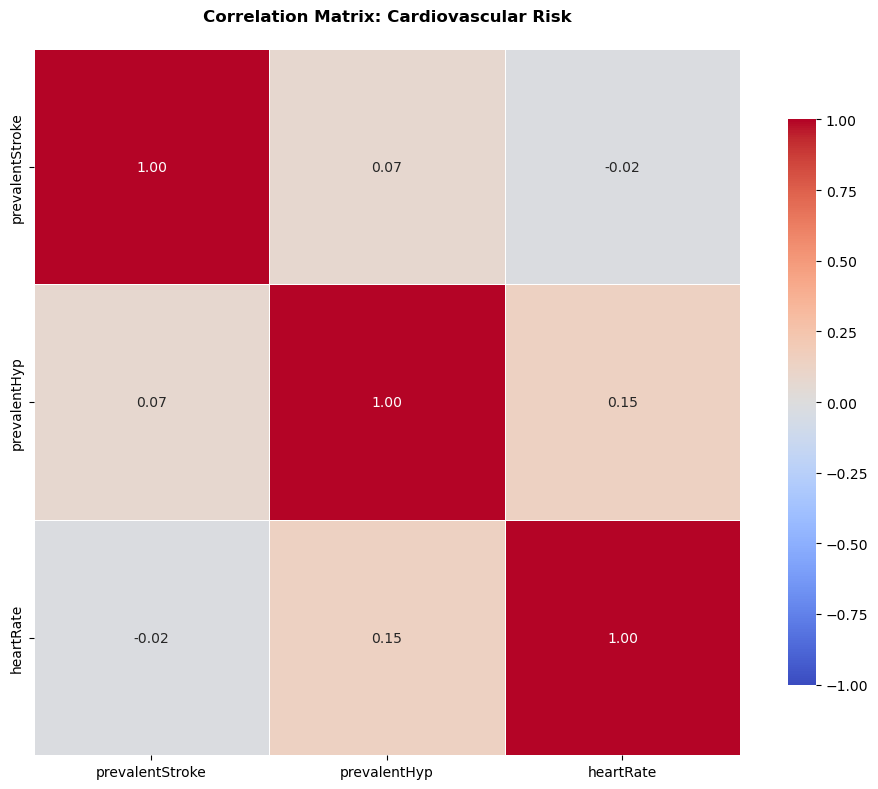


Correlation Matrix:


,cigsPerDay,BMI,education
cigsPerDay,1.000,-0.093,0.008
BMI,-0.093,1.000,-0.138
education,0.008,-0.138,1.000


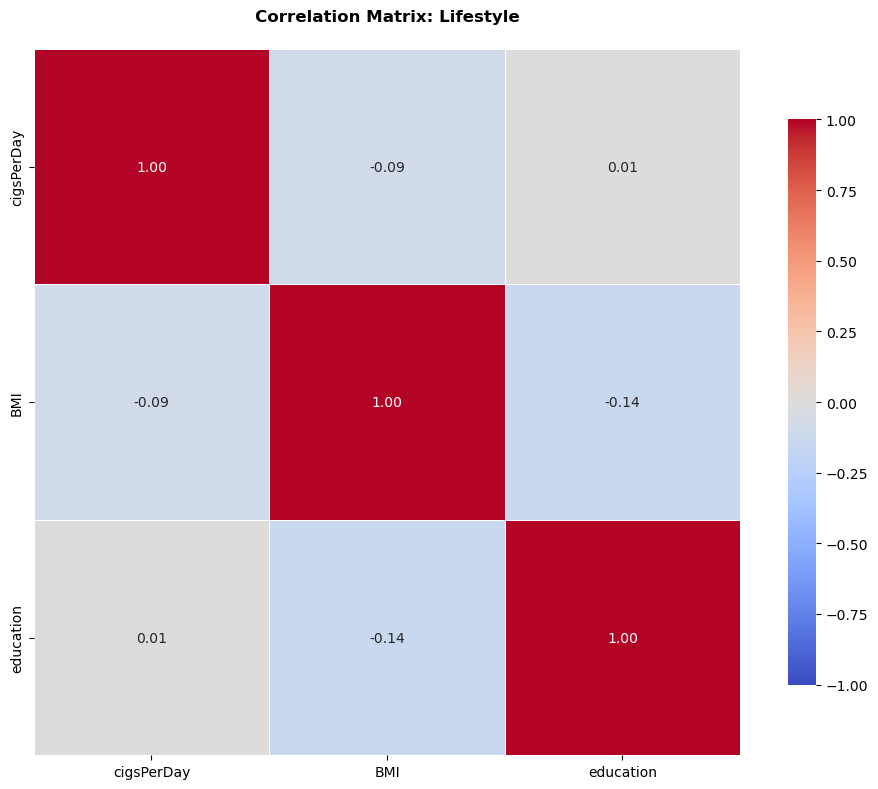


Correlation Matrix:


,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000,-0.166,-0.193,0.123,0.058,0.307,0.101,0.262,0.394,0.206,0.136,-0.013,0.122,0.225
education,-0.166,1.000,0.008,-0.011,-0.035,-0.082,-0.039,-0.023,-0.130,-0.062,-0.138,-0.054,-0.036,-0.054
cigsPerDay,-0.193,0.008,1.000,-0.046,-0.033,-0.066,-0.037,-0.026,-0.089,-0.057,-0.093,0.075,-0.059,0.058
BPMeds,0.123,-0.011,-0.046,1.000,0.117,0.261,0.052,0.081,0.254,0.194,0.101,0.015,0.051,0.087
prevalentStroke,0.058,-0.035,-0.033,0.117,1.000,0.075,0.007,0.000,0.057,0.045,0.026,-0.018,0.018,0.062
prevalentHyp,0.307,-0.082,-0.066,0.261,0.075,1.000,0.078,0.164,0.697,0.616,0.301,0.147,0.087,0.178
diabetes,0.101,-0.039,-0.037,0.052,0.007,0.078,1.000,0.040,0.111,0.050,0.087,0.049,0.618,0.097
totChol,0.262,-0.023,-0.026,0.081,0.000,0.164,0.040,1.000,0.209,0.165,0.116,0.091,0.046,0.082
sysBP,0.394,-0.130,-0.089,0.254,0.057,0.697,0.111,0.209,1.000,0.784,0.327,0.182,0.141,0.216
diaBP,0.206,-0.062,-0.057,0.194,0.045,0.616,0.050,0.165,0.784,1.000,0.378,0.181,0.061,0.145


  (Skipping visualization - too many variables: 14)


In [20]:
# Store correlation matrices for each group
correlation_results = {}

for group_name, group_info in available_groups.items():
    
    # Calculate correlation matrix
    corr_matrix = df_normalized[group_info['variables']].corr()
    correlation_results[group_name] = corr_matrix
    
    # Display correlation matrix
    print(f"\nCorrelation Matrix:")
    display(corr_matrix.round(3))
    
    # Visualize correlation matrix
    if len(group_info['variables']) <= 5:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, 
                    annot=True, 
                    fmt='.2f', 
                    cmap='coolwarm', 
                    center=0,
                    square=True,
                    linewidths=0.5,
                    cbar_kws={"shrink": 0.8},
                    vmin=-1, vmax=1)
        plt.title(f'Correlation Matrix: {group_name}', 
                  fontsize=12, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
    else:
        print(f"  (Skipping visualization - too many variables: {len(group_info['variables'])})")

## 7. Identify High Correlations in Each Group
Now we find highly correlated variable pairs in each group by putting the threshold at 0.7

In [29]:
# Function to find highly correlated variable pairs
def find_high_correlations(corr_matrix, threshold=0.7):
    
    # Get upper triangle of correlation matrix to avoid duplicates
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    # Find pairs with correlation > threshold
    high_corr_pairs = []
    for column in upper_triangle.columns:
        for index in upper_triangle.index:
            corr_value = upper_triangle.loc[index, column]
            if abs(corr_value) > threshold:
                high_corr_pairs.append({
                    'Variable 1': index,
                    'Variable 2': column,
                    'Correlation': corr_value
                })
    
    # Return empty DataFrame with correct columns if no pairs found
    if len(high_corr_pairs) == 0:
        return pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation'])
    
    return pd.DataFrame(high_corr_pairs).sort_values('Correlation', 
                                                      key=abs, 
                                                      ascending=False)

# Find high correlations in each group
high_corr_summary = {}

for group_name, corr_matrix in correlation_results.items():
    
    # Try threshold 0.7 first
    high_corr_df = find_high_correlations(corr_matrix, threshold=0.7)
    
    if len(high_corr_df) > 0:
        print(f"\nHighly Correlated Pairs (|r| > 0.7): {len(high_corr_df)}")
        display(high_corr_df)
        high_corr_summary[group_name] = {'threshold': 0.7, 'pairs': len(high_corr_df)}
    else:
        print("\nNo pairs found with |r| > 0.7")
        print("Checking with threshold |r| > 0.6...")
        high_corr_df = find_high_correlations(corr_matrix, threshold=0.7)
        if len(high_corr_df) > 0:
            display(high_corr_df)
            high_corr_summary[group_name] = {'threshold': 0.6, 'pairs': len(high_corr_df)}
        else:
            print("No pairs found with |r| > 0.6")
            print("✓ All variables in this group are sufficiently independent")
            high_corr_summary[group_name] = {'threshold': 0.6, 'pairs': 0}

# Summary of high correlations across all groups
print("SUMMARY OF HIGH CORRELATIONS ACROSS ALL GROUPS BELOW:")
summary_df = pd.DataFrame.from_dict(high_corr_summary, orient='index')
display(summary_df)



Highly Correlated Pairs (|r| > 0.7): 1


,Variable 1,Variable 2,Correlation
0,sysBP,diaBP,0.784002



No pairs found with |r| > 0.7
Checking with threshold |r| > 0.6...
No pairs found with |r| > 0.6
✓ All variables in this group are sufficiently independent

No pairs found with |r| > 0.7
Checking with threshold |r| > 0.6...
No pairs found with |r| > 0.6
✓ All variables in this group are sufficiently independent

No pairs found with |r| > 0.7
Checking with threshold |r| > 0.6...
No pairs found with |r| > 0.6
✓ All variables in this group are sufficiently independent

Highly Correlated Pairs (|r| > 0.7): 1


,Variable 1,Variable 2,Correlation
0,sysBP,diaBP,0.784002


SUMMARY OF HIGH CORRELATIONS ACROSS ALL GROUPS BELOW:


,threshold,pairs
Blood Pressure,0.7,1
Metabolic,0.6,0
Cardiovascular Risk,0.6,0
Lifestyle,0.6,0
All Numeric,0.7,1


## 8. Variable Selection Strategy
Now we want to select the representative variables after the correlation analysis by removing the highly correlated ones. And for each pair of highly correlated variables, we keep the one with lower average correlation with other variables.

In [34]:
def select_representative_variables(corr_matrix, threshold=0.7):
    
    # Calculate average absolute correlation for each variable
    avg_corr = corr_matrix.abs().mean().sort_values(ascending=True)
    
    variables_to_remove = set()
    variables_to_keep = set(corr_matrix.columns)
    
    # Get upper triangle to avoid checking pairs twice
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    # For each highly correlated pair, remove the one with higher avg correlation
    for column in upper_triangle.columns:
        for index in upper_triangle.index:
            corr_value = upper_triangle.loc[index, column]
            if abs(corr_value) > threshold:
                if avg_corr[index] > avg_corr[column]:
                    variables_to_remove.add(index)
                else:
                    variables_to_remove.add(column)
    
    variables_to_keep = variables_to_keep - variables_to_remove
    
    return sorted(list(variables_to_keep)), sorted(list(variables_to_remove))

# Apply selection to All Numeric group
corr_matrix = correlation_results['All Numeric']
threshold = 0.7

vars_to_keep, vars_to_remove = select_representative_variables(corr_matrix, threshold=threshold)

print(f"Original variables: {len(corr_matrix.columns)}")
print(f"Variables to keep: {len(vars_to_keep)}")
print(f"Variables to remove: {len(vars_to_remove)}")

print(f"\n REMOVING (Redundant):")
for var in vars_to_remove:
    print(f"  - {var}")

print(f"\n KEEPING (Representative):")
for var in vars_to_keep:
    print(f"  - {var}")

Original variables: 14
Variables to keep: 13
Variables to remove: 1

 REMOVING (Redundant):
  - sysBP

 KEEPING (Representative):
  - BMI
  - BPMeds
  - TenYearCHD
  - age
  - cigsPerDay
  - diaBP
  - diabetes
  - education
  - glucose
  - heartRate
  - prevalentHyp
  - prevalentStroke
  - totChol


We chose this approach so that it captures correlations across the entire dataset (not limited to predefined groups), and provides comprehensive dimensionality reduction, and removes redundancy while preserving distinct medical information.


## 9. Create Cleaned DataFrame

In [36]:
# Get all columns to keep (non-numeric + selected numeric variables)
non_numeric_cols = [col for col in df_normalized.columns if col not in numeric_cols]
all_cols_to_keep = non_numeric_cols + vars_to_keep

# Create cleaned dataframe
cleaned_df = df_normalized[all_cols_to_keep].copy()

print(f"Original shape: {df_normalized.shape}")
print(f"Cleaned shape: {cleaned_df.shape}")
print(f"Removed {len(vars_to_remove)} redundant variable(s)")

# Display first few rows
display(cleaned_df.head())

Original shape: (4238, 16)
Cleaned shape: (4238, 15)
Removed 1 redundant variable(s)


,sex,currentSmoker,BMI,BPMeds,TenYearCHD,age,cigsPerDay,diaBP,diabetes,education,glucose,heartRate,prevalentHyp,prevalentStroke,totChol
0,M,No,0.286299,-0.174741,-0.423305,-1.234951,-0.755376,-1.082625,-0.162477,1.982068,-0.207320,0.342704,-0.671101,-0.077033,-0.935776
1,F,No,0.717711,-0.174741,-0.423305,-0.418257,-0.755376,-0.158988,-0.162477,0.020644,-0.249062,1.590087,-0.671101,-0.077033,0.297822
2,M,Yes,-0.113247,-0.174741,-0.423305,-0.184916,0.922662,-0.242955,-0.162477,-0.960068,-0.499512,-0.073090,-0.671101,-0.077033,0.185677
3,F,Yes,0.680943,-0.174741,2.362360,1.331800,1.761681,1.016549,-0.162477,1.001356,0.877962,-0.904679,1.490089,-0.077033,-0.262904
4,F,Yes,-0.662317,-0.174741,-0.423305,-0.418257,1.174368,0.092912,-0.162477,1.001356,0.126613,0.758498,-0.671101,-0.077033,1.082840


## 10.  Export Files

In [39]:
# Save normalized dataframe
df_normalized.to_csv('normalized_dataframe.csv', index=False)

# Save cleaned dataframe
cleaned_df.to_csv('cleaned_dataframe.csv', index=False)